# QMbead code

In [16]:

import pennylane as qml

import math
import numpy as np
import matplotlib.pyplot as plt
import decimal
# from func_lib_VQF_QFT_exponent import my_QFT, my_inv_QFT, convert_num_integer_to_superposition_state, convert_num_bin_string_to_superposition_state
    

In [17]:
device_name = 'default.qubit'  # 'default.qubit' #
print("PennyLane version:", qml.__version__)

PennyLane version: 0.32.0


# functions used
## get_scale_coef,  plot_counts,  my_QFT,  my_inv_QFT
## convert_num_integer_to_superposition_state, 
## convert_num_bin_string_to_superposition_state

In [18]:

# Get the minimum 10**n such that decimal_val*10**n is an
#   integer number, where n is an integer
def get_scale_coef(decimal_val):
    n = 0
    while True:
        result = decimal_val * 10**n
        if result.is_integer():
            break
        n += 1
    return 10**n


def plot_counts(counts):
    # Extract keys and values
    keys = list(counts.keys())
    values = list(counts.values())

    # Create a bar plot
    plt.bar(keys, values)

    # Add labels and title
    plt.xlabel('Exponent')
    # plt.ylabel('Counts')
    # plt.title('Bar Plot of Counts')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

        
def my_QFT(wires, swap_flag=True):
    for i in range(len(wires)):
        qml.Hadamard(wires=wires[i])
        for j in range(i+1, len(wires)):
            qml.CRZ(math.pi/2**(j-i),wires=[wires[i],wires[j]])
        qml.Barrier(wires)
        
    if swap_flag:
        n_wires = len(wires)
        first_half_wires = wires[: n_wires // 2]
        last_half_wires = wires[-(n_wires // 2) :]    
        for wire1, wire2 in zip(first_half_wires, reversed(last_half_wires)):
            qml.SWAP(wires=[wire1, wire2])
        
        
def my_inv_QFT(wires, swap_flag=True):
    ll = list(range(len(wires)))
    
    if swap_flag:
        n_wires = len(wires)
        first_half_wires = wires[: n_wires // 2]
        last_half_wires = wires[-(n_wires // 2) :]
        for wire1, wire2 in zip(reversed(first_half_wires), last_half_wires):
            qml.SWAP(wires=[wire1, wire2])
        
    for i in ll[::-1]:
        for j in range(i+1, len(wires)):
            qml.CRZ(-math.pi/2**(j-i),wires=[wires[i],wires[j]])
        qml.Hadamard(wires=wires[i])
        qml.Barrier(wires)
        
        
def convert_num_integer_to_superposition_state(num):  #
    # Examples: 
    # 37 --> '100101' --> state [1, 0, 1, 0, 0, 1, 0, 0], it represents (|000> + |010> + |101>)/sqrt(3)    37 = 100101
    # 15 --> '1111' --> state [1, 1, 1, 1], it represents (|00> + |01> + |10> + |11>)/2                    15 = 1111
    # 16 --> '10000' --> state [0, 0, 0, 0, 1, 0, 0, 0], it represents |100>                               16 = 10000
    # integer_value = 37  # Replace with your desired integer value
    # result_list = convert_num_integer_to_superposition_state(integer_value)
    # print(result_list)
    # # num, binary form, position_list= 37  100101  [0, 2, 5]   37=2^0 + 2^2 + 2^5
    # # [1, 0, 1, 0, 0, 1, 0, 0], it represents (|000> + |010> + |101>)/sqrt(3)
    
    # integer_value = 15  # Replace with your desired integer value
    # result_list = convert_num_integer_to_superposition_state(integer_value)
    # print(result_list)
    # # num, binary form, position_list= 15  1111    [0, 1, 2, 3]   15=2^0 + 2^1 + 2^2 + 2^3
    # # [1, 1, 1, 1], it represents (|00> + |01> + |10> + |11>)/2
    
    # integer_value = 16  # Replace with your desired integer value
    # result_list = convert_num_integer_to_superposition_state(integer_value)
    # print(result_list)
    # # num, binary form, position_list= 16  10000   [4]    16=2^4
    # # [0, 0, 0, 0, 1, 0, 0, 0], it represents |100>
    s1 = bin(num)[2:]  # Convert integer to binary string without '0b'
    state, nq = convert_num_bin_string_to_superposition_state(s1)
    return state, nq


def convert_num_bin_string_to_superposition_state(s1):
    # Examples:
    # '100101' --> state [1, 0, 1, 0, 0, 1, 0, 0], it represents (|000> + |010> + |101>)/sqrt(3)    37 = 100101
    # '1111' --> state [1, 1, 1, 1], it represents (|00> + |01> + |10> + |11>)/2                    15 = 1111
    # '10000' --> state [0, 0, 0, 0, 1, 0, 0, 0], it represents |100>                               16 = 10000
    # see Examples given in convert_num_integer_to_superposition_state(num) above for more information
    # + convert an integer into a binary string s1, 
    # + the right most bit's position is 0 and leftmost bit's position is most significant.
    # + for each bit in s1, if its value is 1,   add this bit's position into a list: position_list
    # + find the maximum value in the position_list: max_val
    # + find the minimum n such that 2**n >= max_val
    # + create an all-0 list: state
    # + for the state, change the 0 to 1 for each position in position_list
    # + normalize the state
    # return the list and nq, where nq is the number of qubits
    
    # the position_list is a list of positions of '1' counted from rightmost, start from 0
    position_list = [pos for pos, bit in enumerate(s1[::-1]) if bit == '1']
    print('num, binary form, position_list=', int(s1), s1, position_list)
    max_val = max(position_list, default=-1) + 1  # Get the maximum value in position_list
    
    n = 0
    while 2 ** n < max_val:
        n += 1
        
    state = [0] * (2**n)
    for pos in position_list:
        state[pos] = 1
        
    norm = np.linalg.norm(state)  # Calculate the norm of the original list
    normalized_state = [element / norm for element in state]
    
    nq = n # the number of qubits
    return normalized_state, nq



# function: get_product_solution_from_counts()

In [4]:

def get_product_solution_from_counts(counts):
    
    # Find the minimum value in the dictionary
    min_value = min(counts.values())

    # Divide all values by the minimum value and round to the nearest integer
    updated_counts = {key: round(value / min_value) for key, value in counts.items()}
    # Print the updated dictionary
    print(f'updated_counts={updated_counts}')
    
    plt.figure(figsize=(9, 5))
    # plot the counts and updated_counts side by side
    plt.subplot(1,2,1)
    plot_counts(counts)    
    plt.ylabel('Counts')
    
    plt.subplot(1,2,2)
    plot_counts(updated_counts)
    plt.ylabel('Coefficient')
    
    # Show the plot
    plt.show()
    
    
    # calculate the product value u*v = sum_k (coef*2^k)
    sum0 = 0
    for key, value in updated_counts.items():
        sum0 = sum0 + value * 2**(int(key, 2))
        # print(f'key={key}, int_key={int(key, 2)}, value={value}, sum0={sum0}')
        
    return sum0
    

# function: addition_QFT_Draper()  &  addition_QFT_Draper2()

In [5]:

def addition_QFT_Draper(wires_b, wires_a): # this function's output in wires_a can have overflow, solved by using addition_QFT_Draper2()
    qml.Barrier(wires_b+wires_a)
    my_QFT(wires = wires_a, swap_flag = False)
    
    lenb = len(wires_b)
    for i in range(lenb):
        for j in range(lenb-i):
            # print('i,j=', i, j)
            qml.CRZ(math.pi/2**(j), wires=[wires_b[i+j],wires_a[i]])
    qml.Barrier(wires_b+wires_a)
    
    my_inv_QFT(wires=wires_a, swap_flag = False)
    
    
def addition_QFT_Draper2(wires_b, wires_a): # address the overflow problem
    # lena can be larger than or equal to lenb
    qml.Barrier(wires_b+wires_a)
    my_QFT(wires = wires_a, swap_flag = False)
    qml.Barrier(wires_b+wires_a)
    
    lenb = len(wires_b)
    lena = len(wires_a) # lena can be larger than or equal to lenb
    diff = lena-lenb
    for i in range(lena):
        start = max(diff - i, 0)        
        for j in range(start,lena-i):
            # print('i,j=', i, j)
            qml.CRZ(math.pi/2**(j), wires=[wires_b[i+j-diff],wires_a[i]])
    qml.Barrier(wires_b+wires_a)
    
    my_inv_QFT(wires=wires_a, swap_flag = False)
    
    

# function: get_wires_states

In [6]:

def get_wires_states(u, v):
    state_u, n_u = convert_num_integer_to_superposition_state(u)
    state_v, n_v = convert_num_integer_to_superposition_state(v)
    print(f'state_u={state_u}, n_u={n_u}')
    print(f'state_v={state_v}, n_v={n_v}')
    
    # state_b should use less number of qubits than state_a
    n_b = min(n_u, n_v)
    n_a = max(n_u, n_v)
    if n_u <= n_v:  # n_u is smaller
        state_b = state_u
        state_a = state_v
    else:           # n_v is smaller
        state_b = state_v 
        state_a = state_u
    
    # first wires_b  (n_b qubits)
    # followed by wires_carry for a carry qubit  (1 qubit)
    # followed by wires_a  (n_a qubits)
    wires_b = list(range(n_b))
    wires_carry = [n_b]
    wires_a = [i+n_b+1 for i in range(n_a)]
    
    return wires_b, wires_carry, wires_a, state_b, state_a



# Class: QMbead
## func: run_main_circ_return_counts
## func: run_main_circ_return_state   # to delete
## func: run_main_circ_return_expval # to delete
## func: main_circ
## func: run

In [7]:

class QMbead:
    def __init__(self, u, v, mode = 1,  
                 dev_counts_num = 100000, 
                 print_flag=False):
        self.u = u
        self.v = v
        self.measure_type = 'counts'  # measure_type
        # self.wire_anx = wire_anx
        # self.wires_1 = wires_1         
        self.print_flag = print_flag
        self.mode= mode
        
        self.wires_b, self.wires_carry, self.wires_a, \
            self.state_b, self.state_a = get_wires_states(u, v)  
        all_wires = self.wires_b + self.wires_carry + self.wires_a
        
        # for more qubits, use larger counts
        nw = len(all_wires)      
        print(f'total number of qubits used: {nw},  ', end='')
        print(f'n_b={len(self.wires_b)},   ', end='')
        print(f'n_a={len(self.wires_a)}')
        # if nw < 10:
        #     dev_counts_num = 100000
        # elif nw < 12:
        #     dev_counts_num = 1000000    
        # elif nw < 14:
        #     dev_counts_num = 10000000
        self.dev_counts_num = dev_counts_num
        
        if self.measure_type in ['counts', 'sample']:
            self.dev = qml.device(device_name, all_wires, shots=self.dev_counts_num)
        elif self.measure_type in ['sample_all']:
            self.dev = qml.device(device_name, all_wires, shots=2000)
        elif self.measure_type in ['state', 'expval']:
            self.dev = qml.device(device_name, all_wires)
            
        self.dev_counts = qml.device(device_name, all_wires, shots=self.dev_counts_num)
        self.dev_expval = qml.device(device_name, all_wires)
        
    def run_main_circ_return_counts(self):
        @qml.qnode(self.dev_counts)
        def _run_main_circ():
            self.main_circ()
            # lenb = len(self.wires_1)//2
            # wires_count = self.wires_1[lenb:]
            return qml.counts(wires = self.wires_carry + self.wires_a)
        return _run_main_circ()
    
    
    def run_main_circ_return_state(self):
        @qml.qnode(self.dev_counts)
        def _run_main_circ():
            self.main_circ()
            return qml.state()
        return _run_main_circ() 
    
    
    def run_main_circ_return_expval(self):
        @qml.qnode(self.dev_expval)
        def _run_main_circ_return_expval():
            self.main_circ()
            return qml.expval(qml.PauliZ([0])) # measure qubit 0
        if self.print_flag: print(qml.draw(_run_main_circ_return_expval)())
        # print('')
        # if self.print_flag: print(qml.draw(_run_main_circ_return_expval, 
        #                                    expansion_strategy="device")())
        return _run_main_circ_return_expval()
    
    
    def main_circ(self):
        # if self.mode == 1:  # not successful. So I go back to the using the circuit given in https://pennylane.ai/qml/demos/tutorial_qft_arithmetics
        qml.MottonenStatePreparation(self.state_b, wires=self.wires_b)
        qml.MottonenStatePreparation(self.state_a, wires=self.wires_a)    
        
        addition_QFT_Draper2(self.wires_b, self.wires_carry+self.wires_a)
        
        # elif self.mode == 2: # test addition_QFT_Draper(), come from Draper2000 paper, 
            
         
    def run(self):
        Z_exp = self.run_main_circ_return_expval()
        # print('Z_exp=', Z_exp)
                
        # state = self.run_main_circ_return_state()
        # print('state=', state)
        
        counts = self.run_main_circ_return_counts()
        print('counts=', counts)
        
        product = get_product_solution_from_counts(counts)
        print(f'product of u={self.u} and v={self.v}  is  {product}, ', end='')
        print(f'its binary form is {bin(product)} whose length is {len(bin(product))-2}')
        
        uv = self.u*self.v # for verification
        if uv == product:
            print(f'The product calculated by QMbead is correct')
        else:
            print(f'The product calculated by QMbead is wrong, correct value should be {uv}')
            raise ValueError('wrong result by QMbead')
        print('')
        return product
        

# Results for integer multiplication

num, binary form, position_list= 11 11 [0, 1]
num, binary form, position_list= 101 101 [0, 2]
state_u=[0.7071067811865475, 0.7071067811865475], n_u=1
state_v=[0.7071067811865475, 0.0, 0.7071067811865475, 0.0], n_v=2
total number of qubits used: 4,  n_b=1,   n_a=2
0: ──MottonenStatePreparation(M0)─╭||────────────────────────────────────────────────────╭||
1: ───────────────────────────────├||──H─╭●────────╭●────────╭||──────────────╭||────╭||─├||
2: ─╭MottonenStatePreparation(M1)─├||────╰RZ(1.57)─│─────────├||──H─╭●────────├||────├||─├||
3: ─╰MottonenStatePreparation(M1)─╰||──────────────╰RZ(0.79)─╰||────╰RZ(1.57)─╰||──H─╰||─╰||

──╭●────────╭●────────╭●────────╭||───────────────────────────────────────────────────────┤  <Z>
──╰RZ(0.79)─│─────────│─────────├||────╭||───────────────╭||─╭●─────────╭●──────────H─╭||─┤     
────────────╰RZ(1.57)─│─────────├||────├||─╭●──────────H─├||─╰RZ(-1.57)─│─────────────├||─┤     
──────────────────────╰RZ(3.14)─╰||──H─╰||─╰RZ(-1.57)────╰||────────────

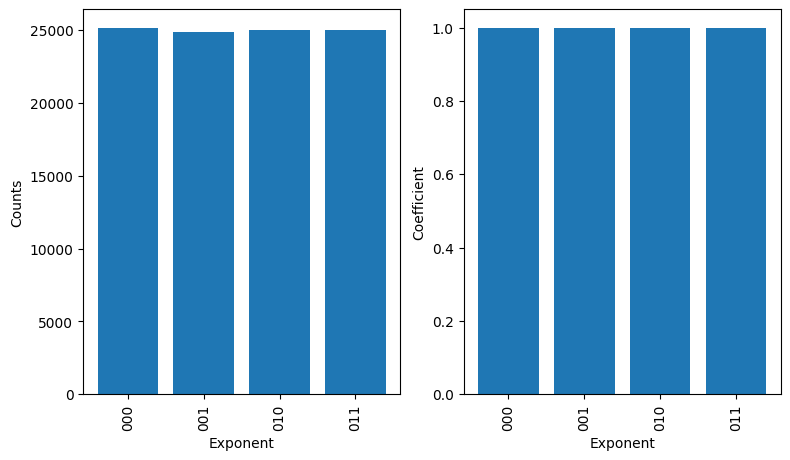

product of u=3 and v=5  is  15, its binary form is 0b1111 whose length is 4
The product calculated by QMbead is correct


In [8]:

    u = 3; v = 5
    circ = QMbead(u, v, dev_counts_num=int(1e5), print_flag=True);  product=circ.run()

num, binary form, position_list= 111 111 [0, 1, 2]
num, binary form, position_list= 1011 1011 [0, 1, 3]
state_u=[0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.0], n_u=2
state_v=[0.5773502691896258, 0.5773502691896258, 0.0, 0.5773502691896258], n_v=2
total number of qubits used: 5,  n_b=2,   n_a=2
counts= {'000': 11227, '001': 22162, '010': 22281, '011': 22232, '100': 11069, '101': 11029}
updated_counts={'000': 1, '001': 2, '010': 2, '011': 2, '100': 1, '101': 1}


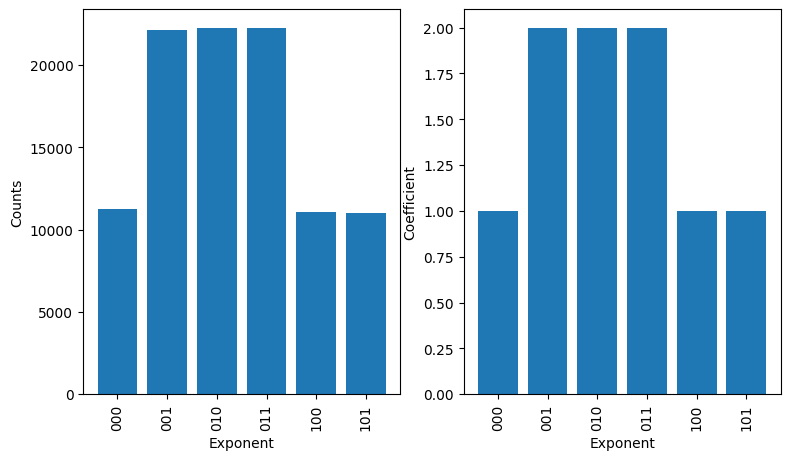

product of u=7 and v=11  is  77, its binary form is 0b1001101 whose length is 7
The product calculated by QMbead is correct


In [9]:

    u = 7; v = 11
    circ = QMbead(u, v, dev_counts_num=int(1e5), print_flag=False);  product=circ.run()

num, binary form, position_list= 100001 100001 [0, 5]
num, binary form, position_list= 1100100 1100100 [2, 5, 6]
state_u=[0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.7071067811865475, 0.0, 0.0], n_u=3
state_v=[0.0, 0.0, 0.5773502691896258, 0.0, 0.0, 0.5773502691896258, 0.5773502691896258, 0.0], n_v=3
total number of qubits used: 7,  n_b=3,   n_a=3
counts= {'0010': 16742, '0101': 16607, '0110': 16769, '0111': 16626, '1010': 16599, '1011': 16657}
updated_counts={'0010': 1, '0101': 1, '0110': 1, '0111': 1, '1010': 1, '1011': 1}


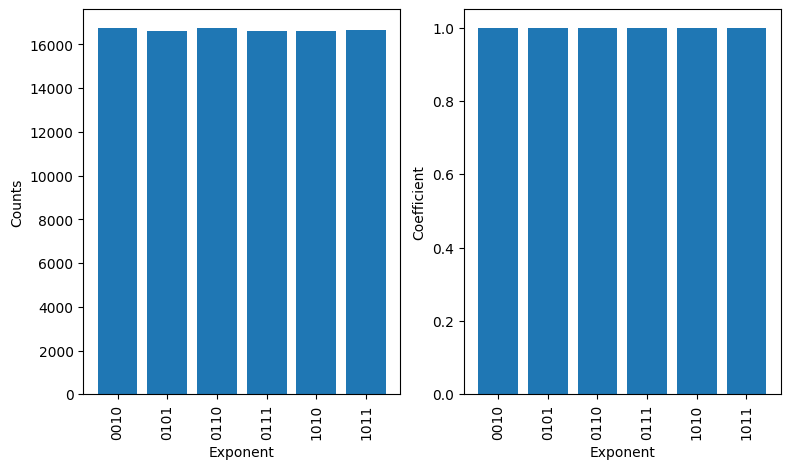

product of u=33 and v=100  is  3300, its binary form is 0b110011100100 whose length is 12
The product calculated by QMbead is correct


In [10]:

    u = 33; v = 100
    circ = QMbead(u, v, dev_counts_num=int(1e5), print_flag=False);  product=circ.run()

num, binary form, position_list= 100100101001 100100101001 [0, 3, 5, 8, 11]
num, binary form, position_list= 1011000101110 1011000101110 [1, 2, 3, 5, 9, 10, 12]
state_u=[0.4472135954999579, 0.0, 0.0, 0.4472135954999579, 0.0, 0.4472135954999579, 0.0, 0.0, 0.4472135954999579, 0.0, 0.0, 0.4472135954999579, 0.0, 0.0, 0.0, 0.0], n_u=4
state_v=[0.0, 0.3779644730092272, 0.3779644730092272, 0.3779644730092272, 0.0, 0.3779644730092272, 0.0, 0.0, 0.0, 0.3779644730092272, 0.3779644730092272, 0.0, 0.3779644730092272, 0.0, 0.0, 0.0], n_v=4
total number of qubits used: 9,  n_b=4,   n_a=4
counts= {'00001': 2909, '00010': 2840, '00011': 2944, '00100': 2882, '00101': 5452, '00110': 5705, '00111': 2897, '01000': 5683, '01001': 5757, '01010': 8559, '01011': 2817, '01100': 8626, '01101': 8638, '01110': 5783, '01111': 5654, '10000': 2859, '10001': 5735, '10010': 2874, '10100': 5781, '10101': 2842, '10111': 2763}
updated_counts={'00001': 1, '00010': 1, '00011': 1, '00100': 1, '00101': 2, '00110': 2, '00111'

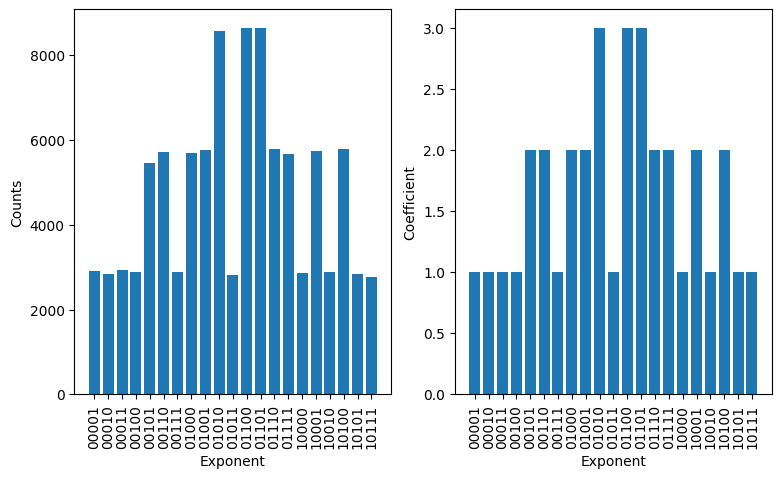

product of u=2345 and v=5678  is  13314910, its binary form is 0b110010110010101101011110 whose length is 24
The product calculated by QMbead is correct


In [11]:

    u = 2345; v = 5678
    circ = QMbead(u, v, dev_counts_num=int(1e5), print_flag=False);  product=circ.run()

num, binary form, position_list= 111001010000000101 111001010000000101 [0, 2, 10, 12, 15, 16, 17]
num, binary form, position_list= 10001010100111111001 10001010100111111001 [0, 3, 4, 5, 6, 7, 8, 11, 13, 15, 19]
state_u=[0.3779644730092272, 0.0, 0.3779644730092272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3779644730092272, 0.0, 0.3779644730092272, 0.0, 0.0, 0.3779644730092272, 0.3779644730092272, 0.3779644730092272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], n_u=5
state_v=[0.30151134457776363, 0.0, 0.0, 0.30151134457776363, 0.30151134457776363, 0.30151134457776363, 0.30151134457776363, 0.30151134457776363, 0.30151134457776363, 0.0, 0.0, 0.30151134457776363, 0.0, 0.30151134457776363, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.30151134457776363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], n_v=5
total number of qubits used: 11,  n_b=5,   n_a=5
counts= {'000000': 1305, '000010': 1301, '000011': 1257, '000100': 1286, '000101': 2530, '000110': 2633, '0

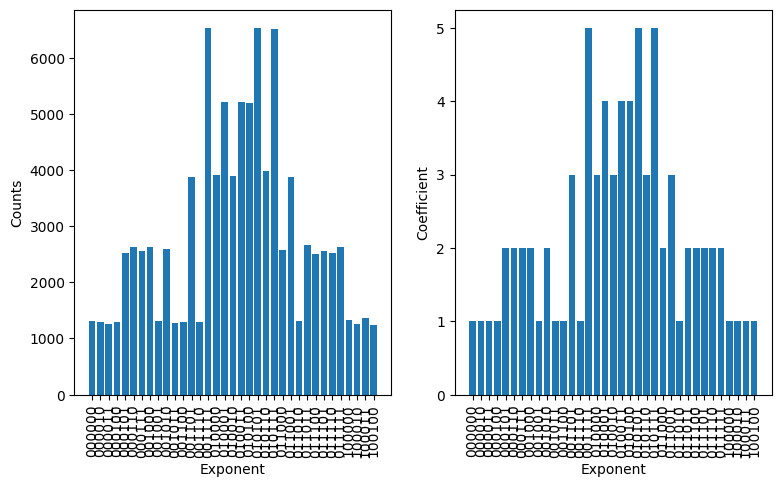

product of u=234501 and v=567801  is  133149902301, its binary form is 0b1111100000000010110100100010111011101 whose length is 37
The product calculated by QMbead is correct


In [12]:

    u = 234501; v = 567801
    circ = QMbead(u, v, dev_counts_num=int(1e5), print_flag=False);  product=circ.run()

num, binary form, position_list= 1011001011101000111110101 1011001011101000111110101 [0, 2, 4, 5, 6, 7, 8, 12, 14, 15, 16, 18, 21, 22, 24]
num, binary form, position_list= 11011000100110010101000101 11011000100110010101000101 [0, 2, 6, 8, 10, 13, 14, 17, 21, 22, 24, 25]
state_u=[0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.0, 0.0, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.0, 0.2581988897471611, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], n_u=5
state_v=[0.2886751345948129, 0.0, 0.2886751345948129, 0.0, 0.0, 0.0, 0.2886751345948129, 0.0, 0.2886751345948129, 0.0, 0.2886751345948129, 0.0, 0.0, 0.2886751345948129, 0.2886751345948129, 0.0, 0.0, 0.2886751345948129, 0.0, 0.0, 0.0, 0.2886751345948129, 0.2886751345948129, 0.0, 0.2886751345948129, 0.2886751345948129, 0.0, 0.0,

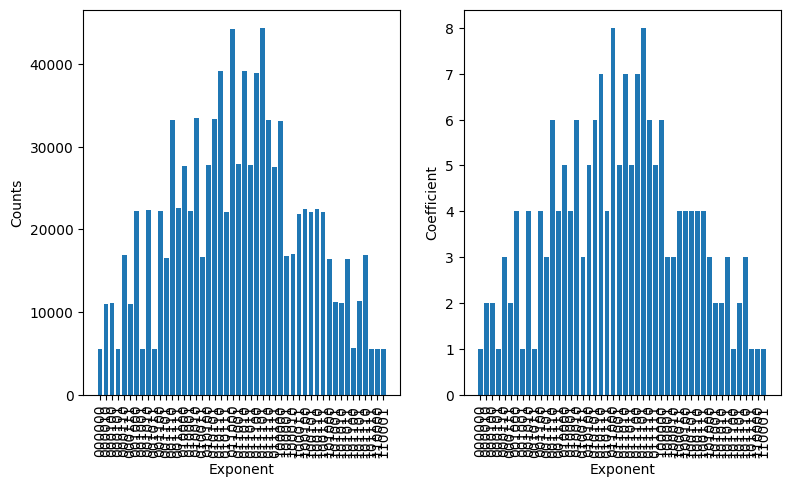

product of u=23450101 and v=56780101  is  1331499103240201, its binary form is 0b100101110101111110111001011000100010100000000001001 whose length is 51
The product calculated by QMbead is correct


In [13]:

    u = 23450101; v = 56780101
    circ = QMbead(u, v, dev_counts_num=int(1e6), print_flag=False);  product=circ.run()

num, binary form, position_list= 10001011110001100000001110110101 10001011110001100000001110110101 [0, 2, 4, 5, 7, 8, 9, 17, 18, 22, 23, 24, 25, 27, 31]
num, binary form, position_list= 101010010011011111000111011110101 101010010011011111000111011110101 [0, 2, 4, 5, 6, 7, 9, 10, 11, 15, 16, 17, 18, 19, 21, 22, 25, 28, 30, 32]
state_u=[0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.2581988897471611, 0.0, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2581988897471611, 0.2581988897471611, 0.0, 0.0, 0.0, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.0, 0.0, 0.2581988897471611], n_u=5
state_v=[0.22360679774997896, 0.0, 0.22360679774997896, 0.0, 0.22360679774997896, 0.22360679774997896, 0.22360679774997896, 0.22360679774997896, 0.0, 0.22360679774997896, 0.22360679774997896, 0.22360679774997896, 0.0, 0.0, 0.0, 0.22360679774997896, 0.22360679774997896, 0

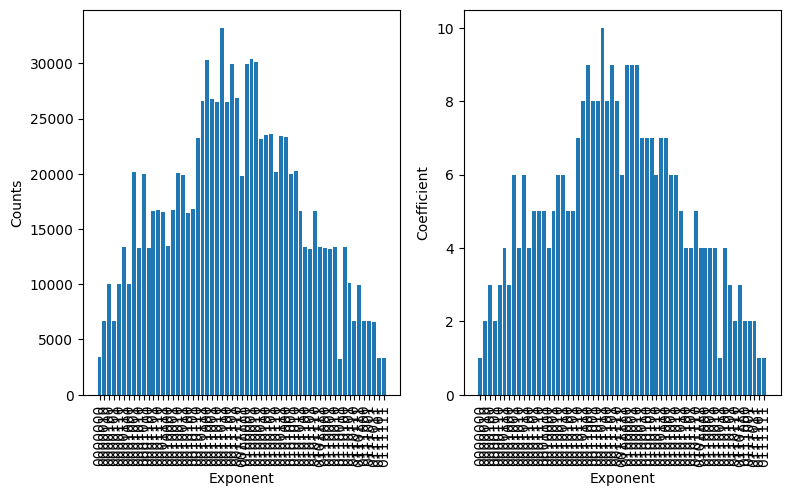

product of u=2345010101 and v=5678010101  is  13314991040425030201, its binary form is 0b1011100011001000010110011100111000110000000010101111001000111001 whose length is 64
The product calculated by QMbead is correct


In [14]:

    u = 2345010101; v = 5678010101
    circ = QMbead(u, v, dev_counts_num=int(1e6), print_flag=False);  product=circ.run()

num, binary form, position_list= 10000010101010010001100011110111111001111011 10000010101010010001100011110111111001111011 [0, 1, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 23, 24, 28, 31, 33, 35, 37, 43]
num, binary form, position_list= 11111111010111100010101101100011100010011111001001001 11111111010111100010101101100011100010011111001001001 [0, 3, 6, 9, 10, 11, 12, 13, 16, 20, 21, 22, 26, 27, 29, 30, 32, 34, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52]
state_u=[0.20412414523193154, 0.20412414523193154, 0.0, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.0, 0.0, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.0, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.20412414523193154, 0.0, 0.0, 0.0, 0.20412414523193154, 0.20412414523193154, 0.0, 0.0, 0.0, 0.20412414523193154, 0.0, 0.0, 0.20412414523193154, 0.0, 0.20412414523193154, 0.0, 0.204

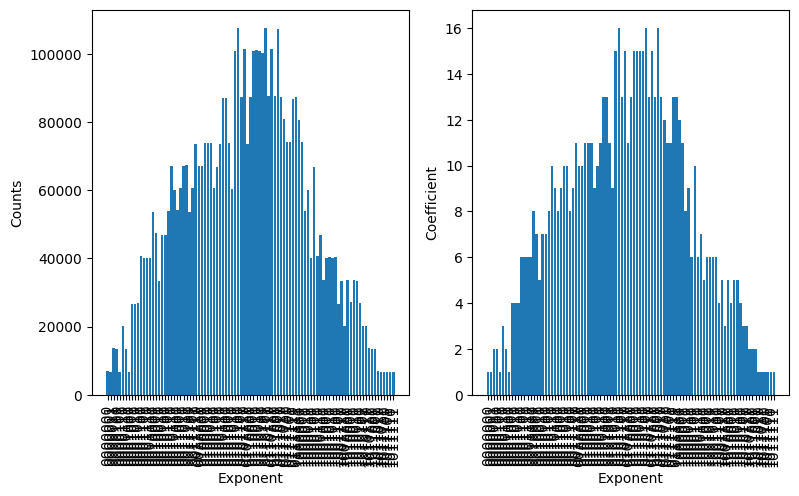

product of u=8978923748987 and v=8984957438475849  is  80675247727968202502337714963, its binary form is 0b1000001001010110100000000001101101001111110011011101010101011110111111010110101111101101100010011 whose length is 97
The product calculated by QMbead is correct


In [15]:

    u = 8978923748987; v = 8984957438475849
    circ = QMbead(u, v, dev_counts_num=int(5e6), print_flag=False);  product=circ.run()

# Results for decimal multiplication

num, binary form, position_list= 1000110111 1000110111 [0, 1, 2, 4, 5, 9]
num, binary form, position_list= 100 100 [2]
state_u=[0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.0, 0.4082482904638631, 0.4082482904638631, 0.0, 0.0, 0.0, 0.4082482904638631, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], n_u=4
state_v=[0.0, 0.0, 1.0, 0.0], n_v=2
total number of qubits used: 7,  n_b=2,   n_a=4
counts= {'00010': 16762, '00011': 16568, '00100': 16674, '00110': 16782, '00111': 16505, '01011': 16709}
updated_counts={'00010': 1, '00011': 1, '00100': 1, '00110': 1, '00111': 1, '01011': 1}


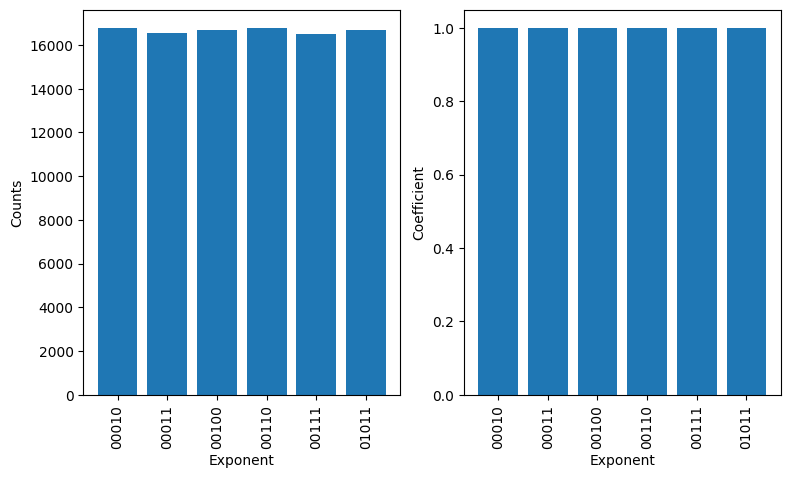

product of u=567 and v=4  is  2268, its binary form is 0b100011011100 whose length is 12
The product calculated by QMbead is correct

the product of the decimal values is  0.0002268000


In [28]:

    u = 0.567; v = 0.0004
    coef_u = get_scale_coef(u);    coef_v = get_scale_coef(v)
    circ = QMbead(int(u*coef_u), int(v*coef_v), dev_counts_num=int(1e5), print_flag=False);  
    product = circ.run()/coef_u/coef_v
    print(f'the product of the decimal values is  {product:.10f}')
    

num, binary form, position_list= 11001 11001 [0, 3, 4]
num, binary form, position_list= 10101111 10101111 [0, 1, 2, 3, 5, 7]
state_u=[0.5773502691896258, 0.0, 0.0, 0.5773502691896258, 0.5773502691896258, 0.0, 0.0, 0.0], n_u=3
state_v=[0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.0, 0.4082482904638631, 0.0, 0.4082482904638631], n_v=3
total number of qubits used: 7,  n_b=3,   n_a=3
counts= {'0000': 5415, '0001': 5616, '0010': 5689, '0011': 11169, '0100': 11238, '0101': 16390, '0110': 11174, '0111': 11093, '1000': 5531, '1001': 5472, '1010': 5652, '1011': 5561}
updated_counts={'0000': 1, '0001': 1, '0010': 1, '0011': 2, '0100': 2, '0101': 3, '0110': 2, '0111': 2, '1000': 1, '1001': 1, '1010': 1, '1011': 1}


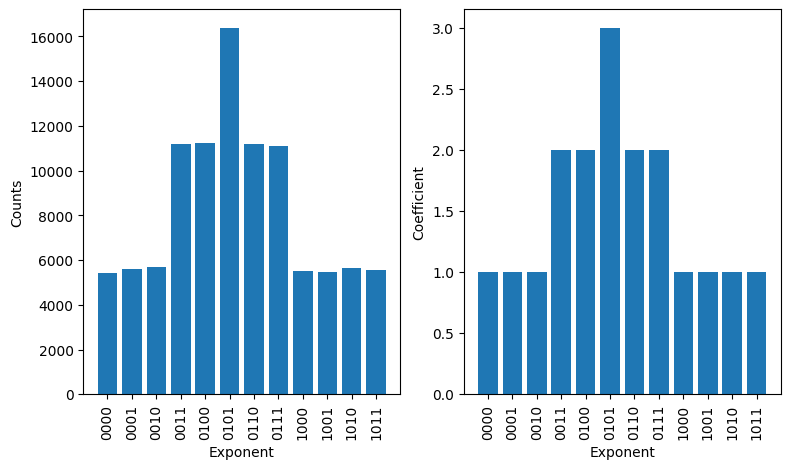

product of u=25 and v=175  is  4375, its binary form is 0b1000100010111 whose length is 13
The product calculated by QMbead is correct

the product of the decimal values is  4.37500


In [26]:

    u = 2.5; v = 1.75
    coef_u = get_scale_coef(u);    coef_v = get_scale_coef(v)
    circ = QMbead(int(u*coef_u), int(v*coef_v), dev_counts_num=int(1e5), print_flag=False);  
    product = circ.run()/coef_u/coef_v
    print(f'the product of the decimal values is  {product:.5f}')

num, binary form, position_list= 10011111010101110010001100111110000101100 10011111010101110010001100111110000101100 [2, 3, 5, 10, 11, 12, 13, 14, 17, 18, 22, 25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 40]
num, binary form, position_list= 110101010010011101100100111110011111010001011111 110101010010011101100100111110011111010001011111 [0, 1, 2, 3, 4, 6, 10, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 29, 30, 32, 33, 34, 37, 40, 42, 44, 46, 47]
state_u=[0.0, 0.0, 0.21320071635561041, 0.21320071635561041, 0.0, 0.21320071635561041, 0.0, 0.0, 0.0, 0.0, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.0, 0.0, 0.21320071635561041, 0.21320071635561041, 0.0, 0.0, 0.0, 0.21320071635561041, 0.0, 0.0, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.0, 0.21320071635561041, 0.0, 0.21320071635561041, 0.0, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.21320071635561041, 0.0, 0.0, 0.21320071

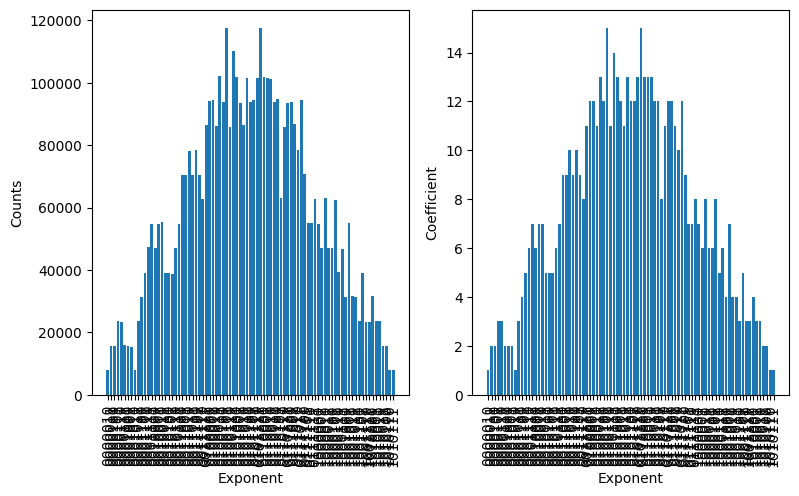

product of u=1368723455020 and v=234365174543455  is  320781111437483078727894100, its binary form is 0b10000100101011000000010101110010101001000110001100010000111010001010011100000010001010100 whose length is 89
The product calculated by QMbead is correct

the product of the decimal values is  320781111437.483078727894100


In [41]:

# Set the precision to a high value
decimal.getcontext().prec = 100
u = 136872.345502; v = 2343651.74543455
coef_u = get_scale_coef(u);    coef_v = get_scale_coef(v)
circ = QMbead(int(u*coef_u), int(v*coef_v), dev_counts_num=int(5e6), print_flag=False);  
product = circ.run()
product_decimal = decimal.Decimal(str(product))/decimal.Decimal(str(coef_u*coef_v))
print(f'the product of the decimal values is  {product_decimal:.15f}')